In [3]:
import subprocess
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from mpl_toolkits.mplot3d import Axes3D

In [53]:
subprocess.check_output(["make"])

b'g++ main.cpp -o main.x -O3 -std=c++14 -Ienv\ng++ --target=x86_64-apple-darwin -Wno-return-type-c-linkage -shared -fpic -o libkite.so env/libkite.cpp -O3 -std=c++14 -Ienv\n'

['Aborting', 'simulation']
24.999316893444824 43.30166457379121
Starting position:  24.999316893444824 0.0 43.30166457379121
Wind speed:  1  m/s
Kite fell to the ground after  1864  steps
3D trajectory:


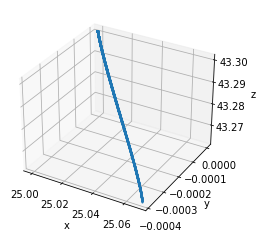

x-z plane:


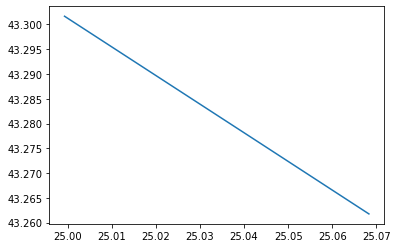

x-y plane:


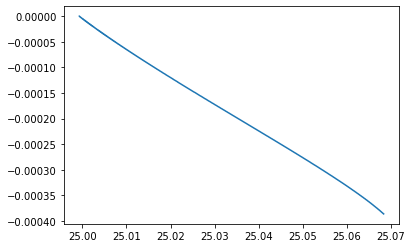

force:


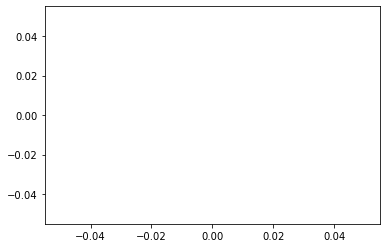

tension:


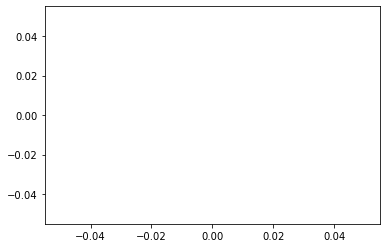

speed:


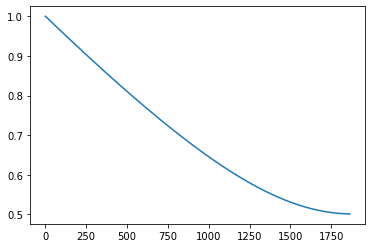

power:


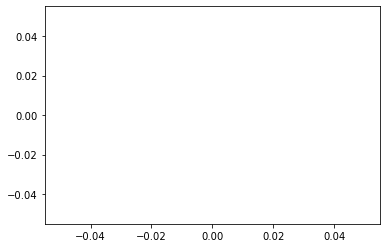

y_w


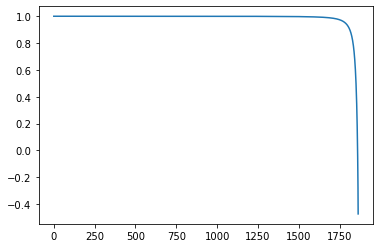

z_w:


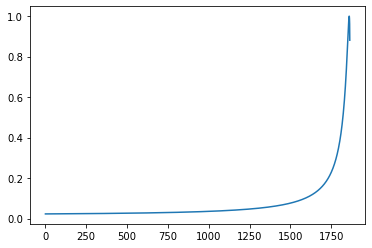

lift module:


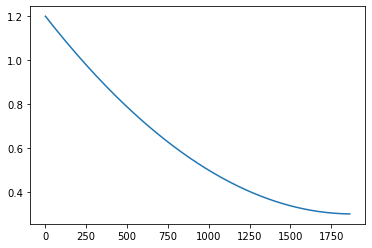

x lift:


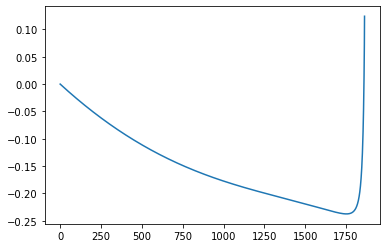

y lift:


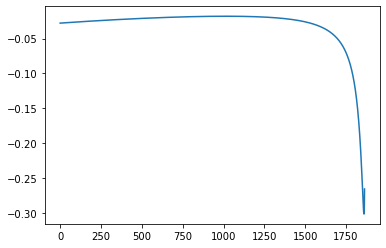

z lift:


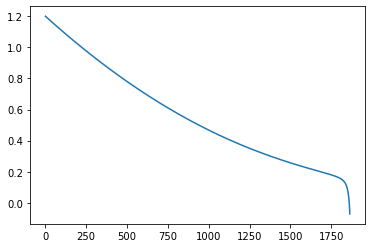

drag module:


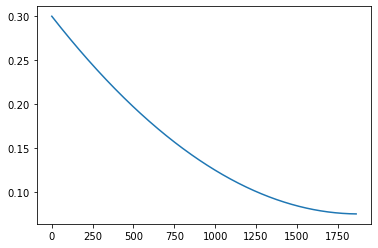

x drag:


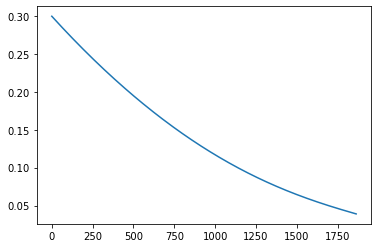

y drag:


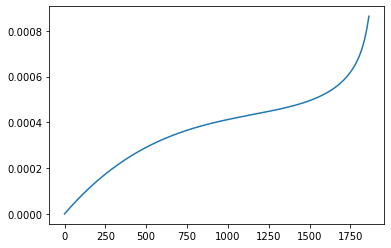

z drag:


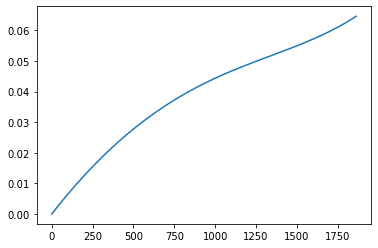

25.17446894230211 44.13969872800227
Starting position:  24.999316893444824 0.0 43.30166457379121
Wind speed:  5  m/s
Kite fell to the ground after  77741  steps
3D trajectory:


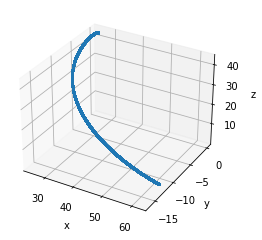

x-z plane:


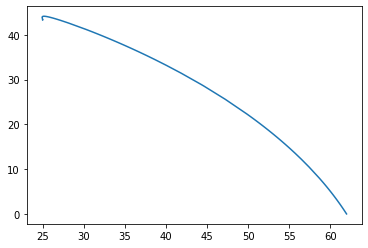

x-y plane:


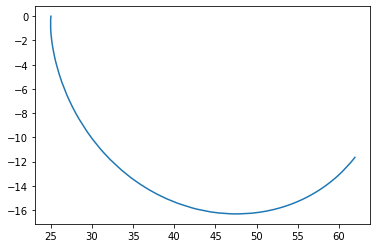

force:


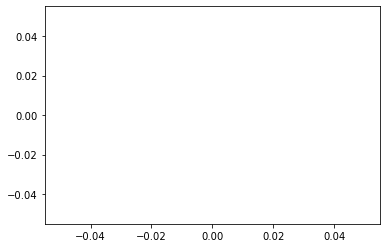

tension:


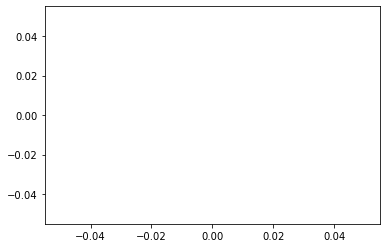

speed:


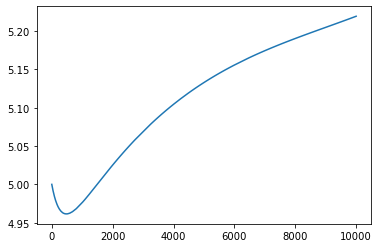

power:


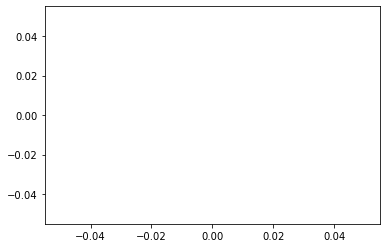

y_w


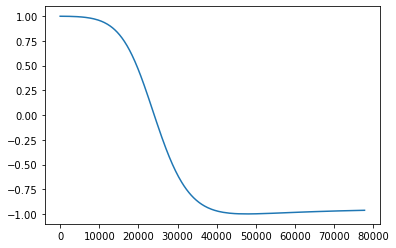

z_w:


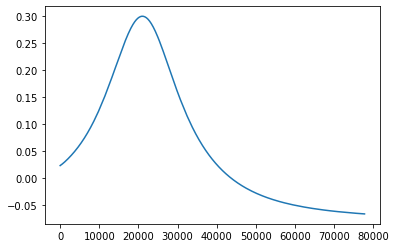

lift module:


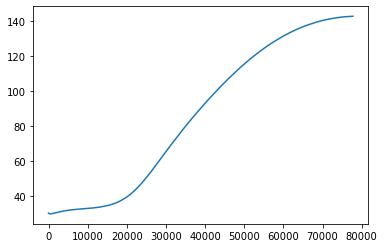

x lift:


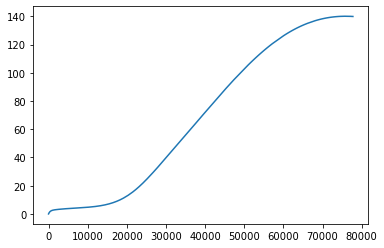

y lift:


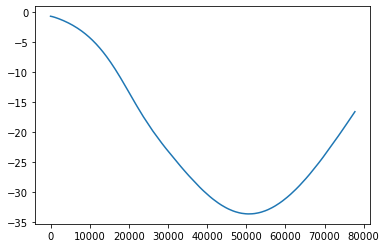

z lift:


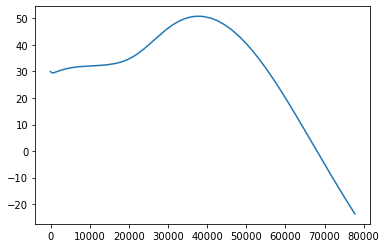

drag module:


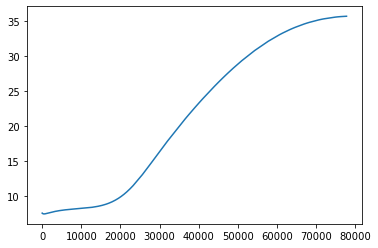

x drag:


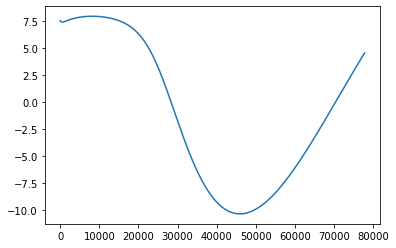

y drag:


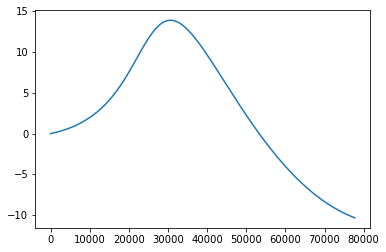

z drag:


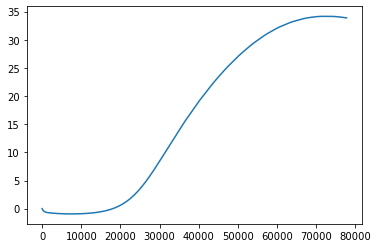

27.173867513083245 46.41536568748835
Starting position:  24.999316893444824 0.0 43.30166457379121
Wind speed:  10  m/s
Kite fell to the ground after  63583  steps
3D trajectory:


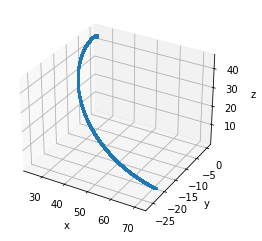

x-z plane:


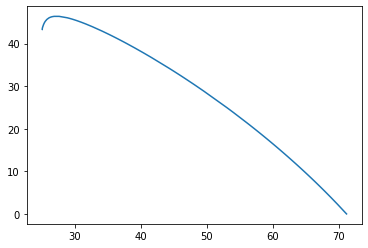

x-y plane:


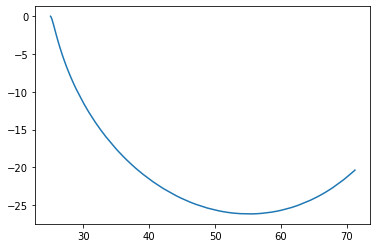

force:


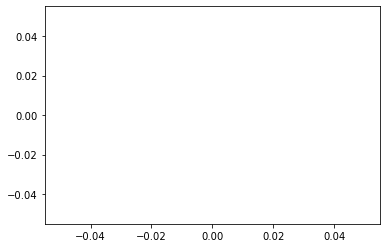

tension:


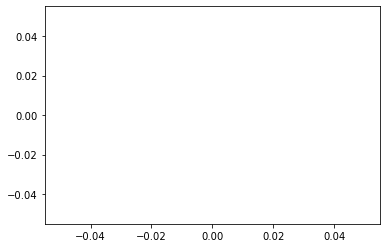

speed:


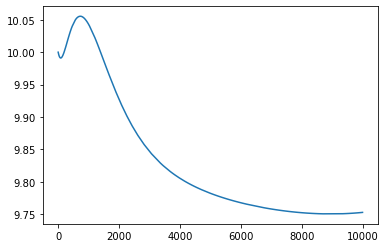

power:


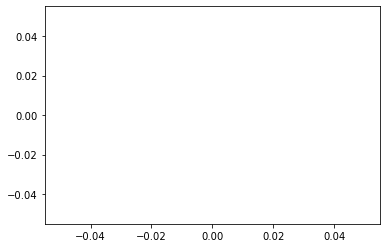

y_w


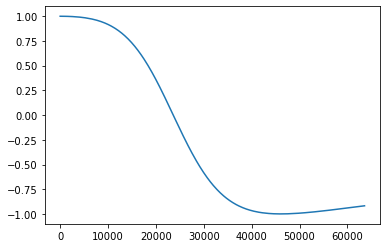

z_w:


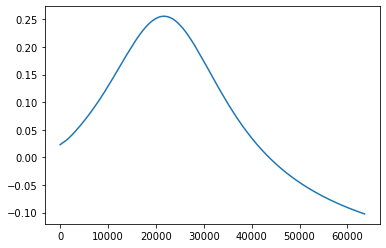

lift module:


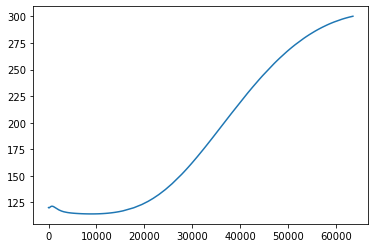

x lift:


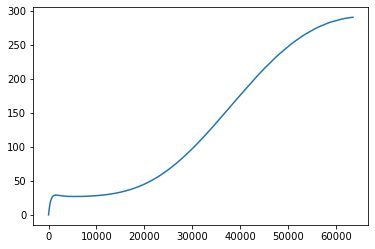

y lift:


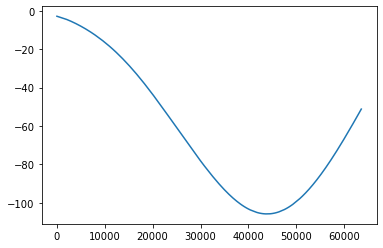

z lift:


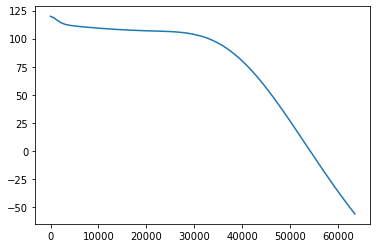

drag module:


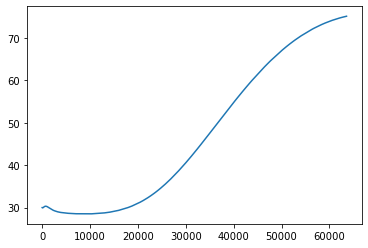

x drag:


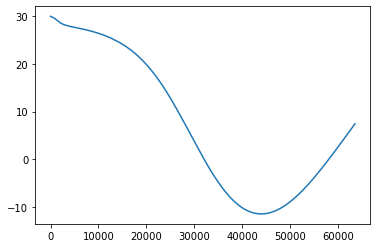

y drag:


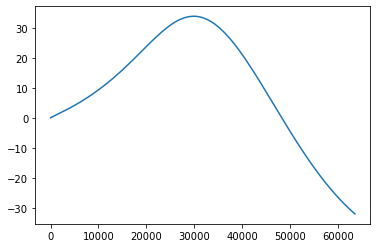

z drag:


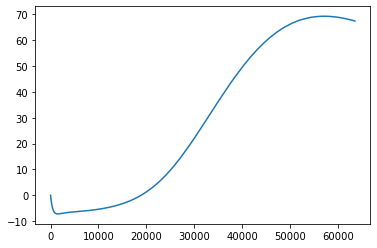

34.175318826753625 48.559243763441444
Starting position:  24.999316893444824 0.0 43.30166457379121
Wind speed:  20  m/s
Kite fell to the ground after  47758  steps
3D trajectory:


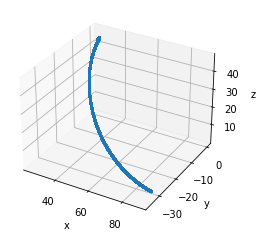

x-z plane:


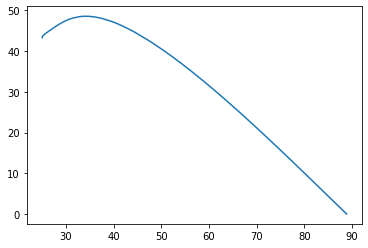

x-y plane:


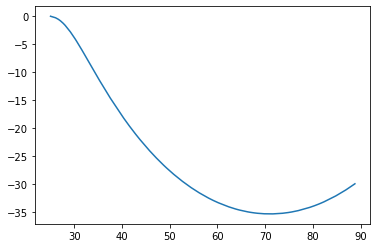

force:


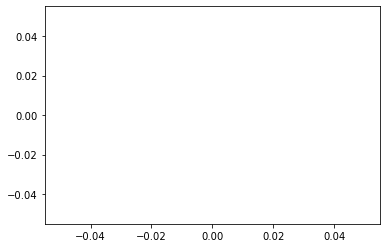

tension:


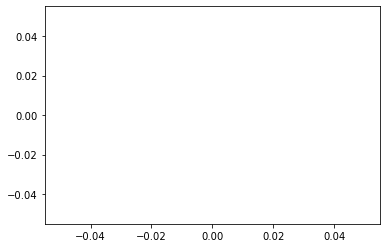

speed:


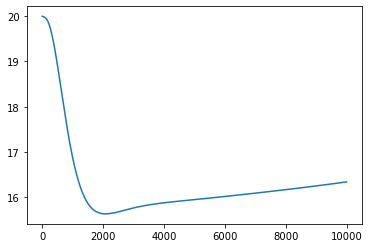

power:


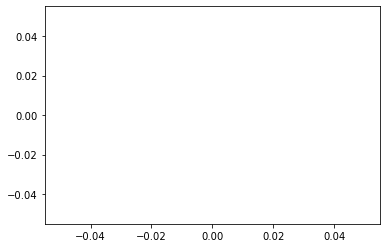

y_w


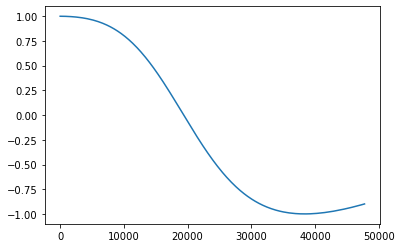

z_w:


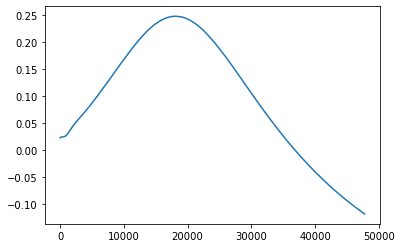

lift module:


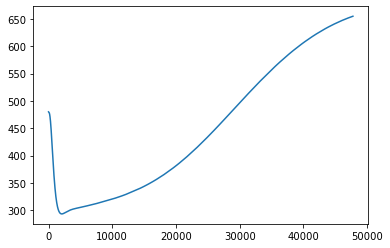

x lift:


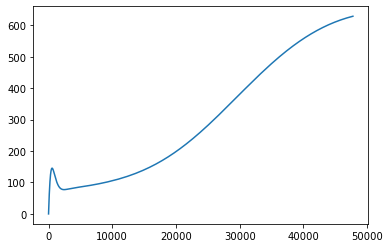

y lift:


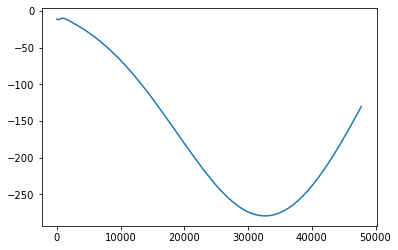

z lift:


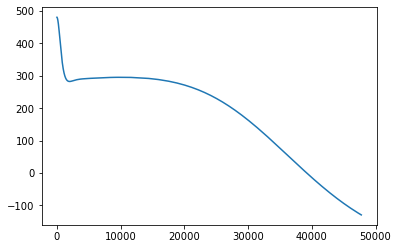

drag module:


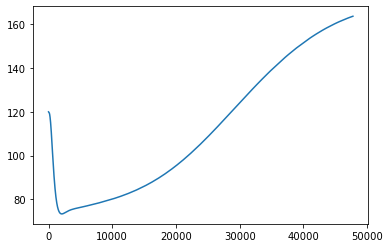

x drag:


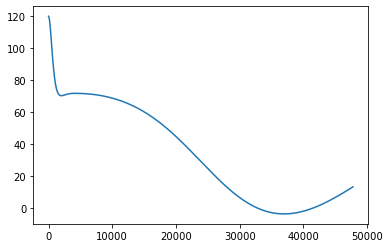

y drag:


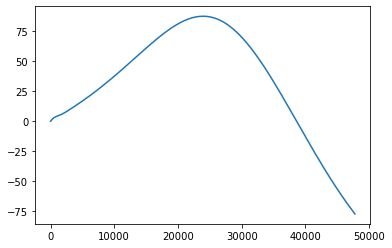

z drag:


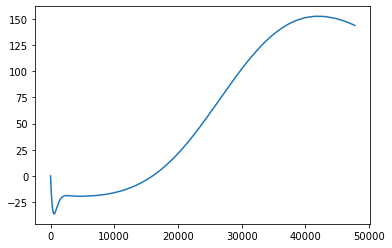

41.10269112771861 50.02852094678696
Starting position:  24.999316893444824 0.0 43.30166457379121
Wind speed:  30  m/s
Kite fell to the ground after  39751  steps
3D trajectory:


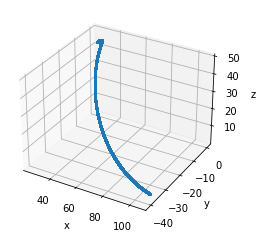

x-z plane:


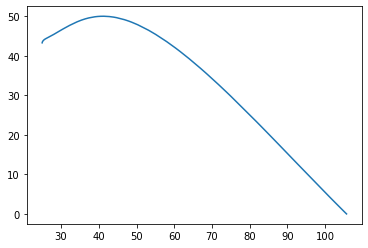

x-y plane:


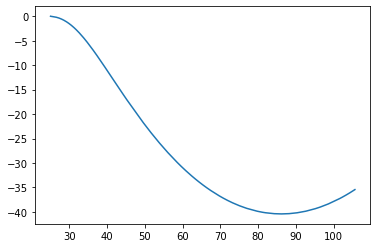

force:


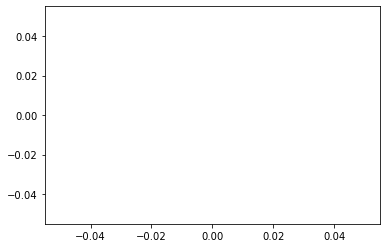

tension:


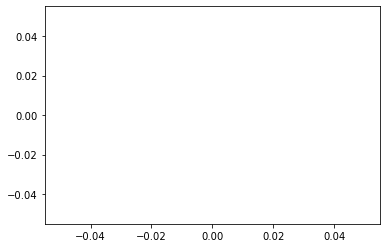

speed:


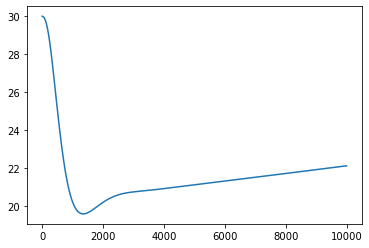

power:


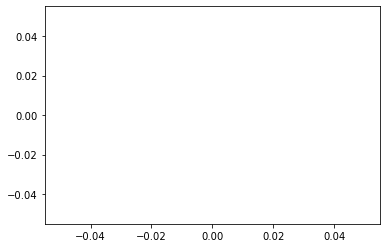

y_w


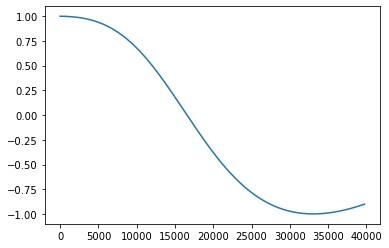

z_w:


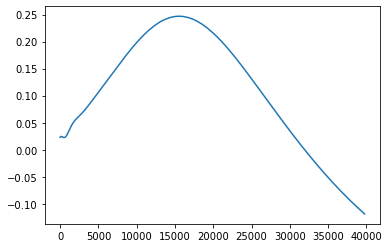

lift module:


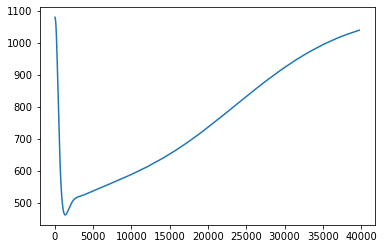

x lift:


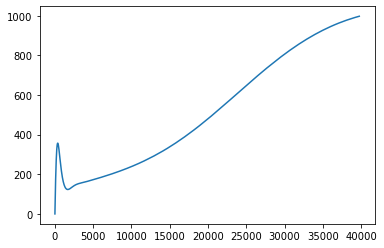

y lift:


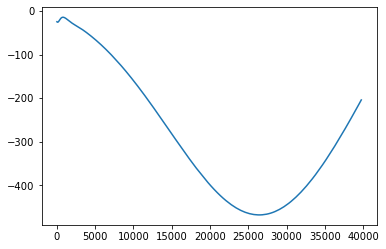

z lift:


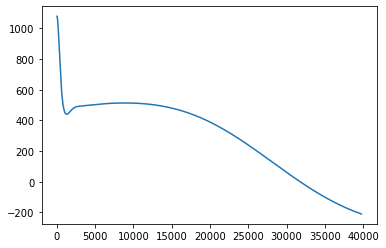

drag module:


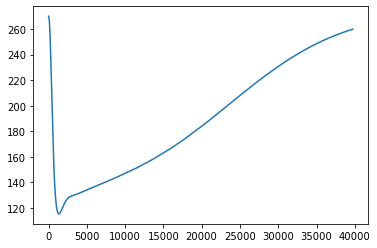

x drag:


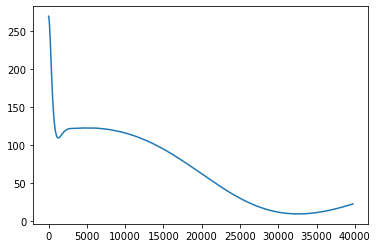

y drag:


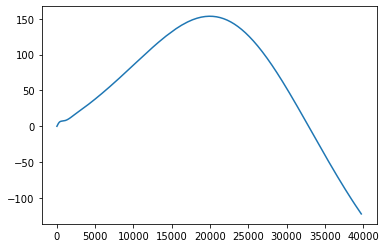

z drag:


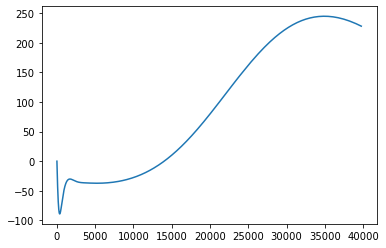

In [54]:
windspeeds=[1, 5, 10, 20, 30] #m/s
for windspeed in windspeeds:
    fig=plt.figure()
    ax = fig.add_subplot(111, projection = '3d')
    theta=[]
    phi=[]
    r=[]
    power=[]
    lift_x=[]
    lift_y=[]
    lift_z=[]
    drag_x=[]
    drag_y=[]
    drag_z=[]
    force_x=[]
    force_y=[]
    force_z=[]
    tension=[]
    speed=[]
    y_w=[]
    z_w=[]
    position_list=subprocess.check_output(["./main.x", "%d"%windspeed]).decode() #simulating for 10 minutes, step=0.01
    position_list=position_list.split("\n")
    for line in position_list[:-1]:
        line=line.split(' ')
        if line[0]=="Position":
            end=line[3]
            theta.append(float(line[4]))
            phi.append(float(line[5]))
            r.append(float(line[6]))
        elif line[0]=="lift:":
            lift_x.append(float(line[1]))
            lift_y.append(float(line[2]))
            lift_z.append(float(line[3]))
        elif line[0]=="drag:":
            drag_x.append(float(line[1]))
            drag_y.append(float(line[2]))
            drag_z.append(float(line[3]))
        elif line[0]=="Power:":
            power.append(float(line[1]))
        elif line[0]=="speed:":
            speed.append(float(line[1]))
        elif line[0]=="tension":
            tension.append(float(line[1]))
        elif line[0]=="force":
            force_x.append(float(line[1]))
        elif line[0]=="y_w":
            y_w.append(float(line[1]))
        elif line[0]=="z_w":
            z_w.append(float(line[1]))
            #force_y.append(float(line[2]))
            #force_z.append(float(line[3]))
        else:
            print(line)
    theta=np.array(theta)
    phi=np.array(phi)
    r=np.array(r)
    lift_x=np.array(lift_x)
    lift_y=np.array(lift_y)
    lift_z=np.array(lift_z)
    drag_x=np.array(drag_x)
    drag_y=np.array(drag_y)
    drag_z=np.array(drag_z)
    tension=np.array(tension)
    force_x=np.array(force_x)
    #force_y=np.array(force_y)
    #force_z=np.array(force_z)
    speed=np.array(speed)
    power=np.array(power)
    y_w=np.array(y_w)
    z_w=np.array(z_w)
    x=np.multiply(r, np.multiply(np.sin(theta), np.cos(phi)))

    y=np.multiply(r, np.multiply(np.sin(theta), np.sin(phi)))
    z=np.multiply(r, np.cos(theta))
    lift_module=np.sqrt(lift_x**2+lift_y**2+lift_z**2)
    drag_module=np.sqrt(drag_x**2+drag_y**2+drag_z**2)
    print(x[np.argmax(z)], np.max(z))
    print("Starting position: ",x[0], y[0], z[0])
    line, =ax.plot(x, y, z, 'o', markersize=1)
    print("Wind speed: ", windspeed, " m/s")
    print("Kite fell to the ground after ", end[:-1], " steps")
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("z")
    print("3D trajectory:")
    plt.show()
    plt.figure()
    plt.plot(x, z)
    print("x-z plane:")
    plt.show()
    plt.figure()
    plt.plot(x, y)
    print("x-y plane:")
    plt.show()
    plt.figure()
    plt.plot(np.arange(len(force_x)), force_x)
    print("force:")
    plt.show()
    plt.figure()
    plt.plot(np.arange(len(tension)), tension)
    print("tension:")
    plt.show()
    plt.figure()
    plt.plot(np.arange(len(speed[:10000])), speed[:10000])
    print("speed:")
    plt.show()
    plt.figure()
    plt.plot(np.arange(len(power)), power)
    print("power:")
    plt.show()
    plt.figure()
    plt.plot(np.arange(len(y_w)), y_w)
    print("y_w")
    plt.show()
    plt.figure()
    plt.plot(np.arange(len(z_w)), z_w)
    print("z_w:")
    plt.show()
    plt.figure()
    plt.plot(np.arange(len(lift_module)), lift_module)
    print("lift module:")
    plt.show()
    plt.figure()
    plt.plot(np.arange(len(lift_x)), lift_x)
    print("x lift:")
    plt.show()
    plt.figure()
    plt.plot(np.arange(len(lift_y)), lift_y)
    print("y lift:")
    plt.show()
    plt.figure()
    plt.plot(np.arange(len(lift_z)), lift_z)
    print("z lift:")
    plt.show()
    plt.figure()
    plt.plot(np.arange(len(drag_module)), drag_module)
    print("drag module:")
    plt.show()
    plt.figure()
    plt.plot(np.arange(len(drag_x)), drag_x)
    print("x drag:")
    plt.show()
    plt.figure()
    plt.plot(np.arange(len(drag_y)), drag_y)
    print("y drag:")
    plt.show()
    plt.figure()
    plt.plot(np.arange(len(drag_z)), drag_z)
    print("z drag:")
    plt.show()
    